## 8.6. XGBoost_Odev

#### Ev fiyatlarinin tahmin edilmesi: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',200)

import warnings
warnings.filterwarnings(action='ignore')

baslik_font = {'family': 'arial', 'color':'darkred', 'weight':'bold', 'size': 13}
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
ev = pd.read_csv('house_prices_train.csv')
ev.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# oncelikleri evlerin insa edilme ve tamir edilme tarihlerinden yillari hesaplayalim

ev['today'] = 2021
ev['ageBuilt'] = ev['today'] - ev['YearBuilt']
ev['ageRemod'] = ev['today'] - ev['YearRemodAdd']

In [4]:
# iliskili olabilecegini dusundugum kategorik degiskenlerimizi duzenleyelim ve korelasyon matrisimize ekleyelim

ev = pd.get_dummies(data=ev, columns=['MSZoning', 'LotShape','Utilities','SaleCondition','BldgType'])

In [8]:
X = ev[['OverallQual','ageBuilt','ageRemod','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd',
          'GarageCars','GarageArea']]
Y = ev['SalePrice']

X_egitim,X_test,Y_egitim,Y_test = train_test_split (X,Y,test_size=0.2,random_state=40)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', seed=123)

In [10]:
xg_reg.fit(X_egitim,Y_egitim)
Y_tahmin = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_tahmin))
print("RMSE: %f" % (rmse))

[08:33:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[08:33:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 31879.000026


In [12]:
DM_train = xgb.DMatrix(data = X_egitim, label=Y_egitim)
DM_test =  xgb.DMatrix(data = X_test, label=Y_test)
params = {"booster":"gblinear", "objective":"reg:linear"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

[21:04:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
Y_tahmin_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_tahmin_gblinear))
print("RMSE: %f" % (rmse))

RMSE: 42958.959240


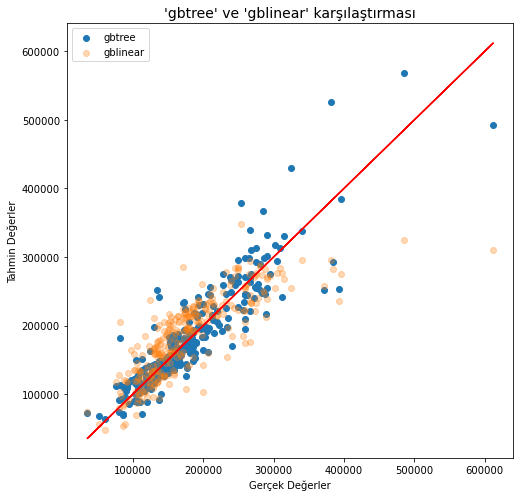

In [14]:
plt.figure(figsize=(8,8))
plt.title("'gbtree' ve 'gblinear' karşılaştırması", size = 14)
ax1 = plt.scatter(Y_test, Y_tahmin)
ax2 = plt.scatter(Y_test, Y_tahmin_gblinear, alpha=0.30)
ax3 = plt.plot(Y_test, Y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

In [18]:
# her iki model de yuksek degerlerde cok iyi sonuclar veremese de, simdilik karar agaci ile daha iyi bir RMSE sonucuna ulasiyoruz